# Лавренов Виталий М221БД

Целью данной работы является построение модели для предсказания флуоресценции глиом головного мозга по имеющимся данным, предоставленным институтом нейрохирургии. Врачи перед операцией вводят препарат, который вызывает эффект флуоресценции(свечения) опухоли, что упрощает проведение операции, так как опухоль становится лучше видно на приборах. Проблема в том, что после ввода препарата опухоль не всегда начинает светиться, а препарат достаточно дорогой. 

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('dataset.xlsx', skiprows=9, nrows=320)

Примерно так выглядят данные, предоставленные институтом нейрохирургии. Данные к сожалению плохо заполнены и многие колонки являются бесполезными. Так же присутствует всего лишь 320 записей.

In [3]:
data

,№,ИБ,ФИО,Города,Пол,Возраст,Отделение,Дата операции,Grade,Гистология,...,Противоэпилептические,Unnamed: 73,Unnamed: 74,Биопсия,Unnamed: 76,Unnamed: 77,Размеры,Кисты,Эпиприступы.1,Объем резекции
0,1,415/10,Крышталь,М,м,70,9,2010-02-02,IV,Глиобластома,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1403/10,Пономаренко,М,м,59,9,2010-03-30,IV,Глиобластома,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2663/10,Суралиев,О (Астрах.обл),м,60,9,2010-06-16,IV,Глиобластома,...,0,2006-03-29,0.0,нет,нет,NaN,42,1.0,0.0,NaN
3,4,2687/10,Литвинов,МО,м,25,9,2010-06-17,III,Олигоастроцитома,...,0,2006-06-15,0.0,нет,нет,NaN,40,NaN,0.0,NaN
4,5,2754/10,Гаврилина,С (Владимирская область),ж,27,9,2010-06-17,III,Анапластическая олигоастроцитома,...,Ф 400,2006-06-09,7.0,до 5%,NaN,NaN,35,1.0,1.0,NaN
5,6,4288/10,Галстян,МО,м,37,9,2010-09-23,IV,Глиобластома,...,Ф 600,2006-06-15,1.0,нет,NaN,Нет,40,NaN,1.0,NaN
6,7,5289/10,Зеленев,МО,м,51,9,2010-11-12,IV,Глиобластома,...,Ф 800,2006-09-19,3.0,NaN,NaN,NaN,54,NaN,2.0,NaN
7,8,5421/10,Редянов,МО,м,63,9,2010-11-18,IV,Глиобластома,...,0,NaT,39032.0,NaN,NaN,NaN,С,0.0,0.0,NaN
8,9,5498/10,Садовский,М,м,51,9,2010-11-23,IV,Глиобластома,...,0,NaT,39038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
9,10,5517/10,Рождественская,М,ж,30,9,2010-11-24,IV,Глиобластома,...,0,NaT,39043.0,NaN,NaN,NaN,40,1.0,0.0,NaN


In [20]:
for c in data.columns:
    print(c)

№
ИБ
ФИО
Города
Пол
Возраст
Отделение
Дата операции
Grade
Гистология
Сторона
Лоб
Висок
Темя
Затылок
Островок
СТ
Локализация
П/ПР
Локализация первичной опухоли
Unnamed: 20
фМРТ
ASL-перфузия
Опухоль
Норма белое вещ-во
Нормирование ASL
HARDI: 
База по долгожителям
РНФ
База Агеева
Предоп МР-спектроскопия
Видимая флуоресценция
Ост. флуоресценция
Unnamed: 33
спектроскопия
Спектры И/О
Спек МАХ
ПЭТ
УЗН
Нейрофизиологический мониторинг
Информация
Проводилось?
Изменение ИО
Проведение
Сила тока
Нашли
Метод
Проведение.1
Сила тока.1
Нашли.1
Метод.1
Да
Речевые зоны
Ассоциативные пути
База Огурцовой
До операции
На момент выписки
Динамика
Эпиприступы
6 мес
12 мес
24 мес
36 мес
>36 мес
6 мес.1
12 мес.1
24 мес.1
36 мес.1
>36 мес.1
Дексаметазон, доза
Дексаметазон сроки
Дексазон, дни
Противоэпилептические
Unnamed: 73
Unnamed: 74
Биопсия
Unnamed: 76
Unnamed: 77
Размеры
Кисты
Эпиприступы.1
Объем резекции


Для начала стоит привести в порядок название некоторых колонок.

In [3]:
ndata = data.iloc[range(320)]
ndata = ndata.rename(index=str, columns={u'До операции': u'ИК До операции',
                                        u'На момент выписки' : u'ИК На момент выписки',
                                        u'Динамика': u'ИК Динамика',
                                        u'Проведение': u'Стимуляция коры Проведение',
                                        u'Нашли': u'Стимуляция коры Нашли',
                                        u'Сила тока': u'Стимуляция коры Сила тока',
                                        u'Метод': u'Стимуляция коры Метод',
                                        u'Проведение.1': u'Ложе удаленной опухоли Проведение',
                                        u'Нашли.1': u'Ложе удаленной опухоли Нашли',
                                        u'Сила тока.1': u'Ложе удаленной опухоли Сила тока',
                                        u'Метод.1': u'Ложе удаленной опухоли Метод',
                                        u'Unnamed: 20': u'Где рецидив?',
                                        u'Unnamed: 77' : u'Биопсия IDH1',
                                        u'Биопсия': u'Биопсия Ki67 (%)',
                                        u'Unnamed: 76': u'Биопсия CD31',
                                        u'Unnamed: 33': u'Ост. флуоресценция тип',
                                        u'Да': u'Хирургия с пробуждением'})

После просмотра всех колонок было выявленно некоторое кол-во колонок, которые могут использоваться в анализе, ввиду заполненности и логических причин. Целевой переменной является колонка 'Видимая флуоресценция'.

In [4]:
important_columns = [u'Пол', u'Возраст', u'Отделение', u'Grade', u'Сторона', u'Висок', u'Затылок',u'СТ', u'П/ПР',
                    u'ASL-перфузия', u'HARDI: ',  u'спектроскопия', u'Гистология',
                    u'Лоб', u'Темя', u'Островок', u'фМРТ', u'Нейрофизиологический мониторинг',
                    u'Стимуляция коры Проведение', u'Стимуляция коры Нашли', u'Ложе удаленной опухоли Проведение',
                     u'Ложе удаленной опухоли Нашли', u'Ассоциативные пути', u'ИК До операции',
                    u'ИК На момент выписки', u'ИК Динамика']#u'Локализация'

mb_important = [u'Где рецидив?', u'Норма белое вещ-во', u'РНФ', u'Спек МАХ',u'УЗН', u'Изменение ИО',
               u'Стимуляция коры Сила тока', u'Стимуляция коры Метод', u'Ложе удаленной опухоли Сила тока', 
                u'Ложе удаленной опухоли Метод', u'Речевые зоны', u'База Огурцовой', 
                u'Дексаметазон сроки', u'Противоэпилептические', u'Unnamed: 74', u'Размеры', 
                u'Локализация первичной опухоли', u'Опухоль', u'Нормирование ASL', u'База по долгожителям',
               u'База Агеева', u'Спектры И/О', u'ПЭТ', u'Проводилось?', u'Хирургия с пробуждением', u'Дексаметазон, доза', 
                u'Дексазон, дни', u'Unnamed: 73', u'Биопсия Ki67 (%)', u'Биопсия IDH1', u'Кисты', u'Эпиприступы']

In [22]:
len(mb_important)

32

Для начала стоит определить различные вспомогательные функции для выборки колонок.

In [5]:
data_for_analis = 0
y = 0
def create_base_data():
    global data_for_analis
    global y
    data_for_analis = ndata[important_columns]
    data_for_analis = data_for_analis.replace({u'Пол': {u'м': 1, u'ж': 0},#?
                         u'Grade': {u'IV': 4, u'III': 3, u'II': 2, u'I': 1},
                         u'Сторона': {u'Л': -1, u'П': 1, u'Д': 0},#?
                         #u'Эпиприступы': {nan: 0},
                         u'ASL-перфузия': {u'Нет': 0, u'Да': 1},
                         u'HARDI: ': {u'Нет': 0, u'Да': 1},
                         u'спектроскопия': {u'Нет': 0, u'Да': 1},
                         u'фМРТ': {u'Нет': 0, u'Да': 1, u'нет выписки': -1}, #?
                         u'Нейрофизиологический мониторинг': {u'Нет': 0, u'Да': 1},
                         u'Стимуляция коры Проведение': {u'Нет': 0, u'Да': 1},
                         u'Ложе удаленной опухоли Проведение': {u'Нет': 0, u'Да': 1},
                         u'Отделение': {u'7 (2я опер.)': 7}
                        })
    data_for_analis = data_for_analis.fillna({
                        u'Стимуляция коры Проведение': 0,
                        u'Стимуляция коры Нашли': 0,
                        u'Ложе удаленной опухоли Проведение':0,
                        u'Ложе удаленной опухоли Нашли': 0,
                        u'Ассоциативные пути': 0
                       })
    data_for_analis[u'Отделение'] = data_for_analis[u'Отделение'].astype(float)
    #gistology
    gists = dict()
    i = 0
    for gist in data_for_analis[u'Гистология'].unique():
        gists[gist] = i
        i += 1
    data_for_analis = data_for_analis.replace({u'Гистология': gists})

    y = ndata[u'Видимая флуоресценция']

In [6]:
def Zad(x):
    if x.lower().find(u'зад') != -1:
        return 1
    else:
        return 0
def propperties(x):
    x = x.lower()
    if x.find(u'парас') != -1:
        return 1
    elif x.find(u'премот') != -1:
        return 2
    elif x.find(u'подкорк') != -1:
        return 3
    elif x.find(u'моз') != -1:
        return 4
    elif x.find(u'ост') != -1:
        return 5
    elif x.find(u'жел') != -1:
        return 6
    else:
        return 0
def add_localization():
    global data_for_analis
    zad = ndata[u'Локализация'].apply(Zad).rename(u'Зад')
    localiztion = ndata[u'Локализация'].apply(propperties)
    data_for_analis.insert(0, u'Зад', zad)
    data_for_analis.insert(0, u'Локализация', localiztion)
    
def add_yes_no_column(column):
    global data_for_analis
    tk_mvp = ndata[column].fillna(0)
    tk_mvp = tk_mvp.replace({u'Да': 1, u'Нет': 0})
    data_for_analis.insert(0, column, tk_mvp)

def add_na_column(column):
    global data_for_analis
    unknown = ndata[column].fillna(0)
    data_for_analis.insert(0, column, unknown)
    
def add_category_column(column, depth=True):
    global data_for_analis
    if depth:
        anti_epileptic = ndata[column].fillna(0)
        epipts = dict()
        i = 1
        for gist in anti_epileptic.unique():
            if gist != 0:
                epipts[gist] = i
                i += 1
        anti_epileptic = anti_epileptic.replace(epipts)
        data_for_analis.insert(0, column, anti_epileptic)
    else:
        pass
def add_info_column():
    global data_for_analis
    info = ndata[u'Информация'].fillna(0)
    info = info.replace({u'Нет данных': 0, u'Ничего': 0, u'Есть': 1, u'Навигация': 2, u'ССВП': 3, u'М+Б': 4})
    data_for_analis.insert(0, u'Информация', info)
    
def add_bases():
    base_rnf = ndata[u'РНФ']
    base_rnf = base_rnf.replace({u'Да': 1, u'Нет': 0})
    data_for_analis.insert(0, u'РНФ', base_rnf)

    base_elder = ndata[u'База по долгожителям']
    base_elder = base_elder.replace({u'Да': 1, u'Нет': 0})
    data_for_analis.insert(0, u'База по долгожителям', base_elder)

    base_ageev = ndata[u'База Агеева']
    base_ageev = base_ageev.replace({u'Да': 1, u'Нет': 0})
    data_for_analis.insert(0, u'База Агеева', base_ageev)

In [7]:
y_n_columns = [u'Проводилось?', u'Хирургия с пробуждением']
na_columns = [u'Изменение ИО', u'Речевые зоны', u'Кисты', u'Эпиприступы', u'Unnamed: 74']

А так же функцию для тестирования алгоритмов

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

def check_models(X, y, metric='accuracy'):
    res = {'LogisticRegression': 0,
           'DecisionTree': 0,
           'GaussianNB': 0,
           'SVC': 0,
           'SGD': 0,
           'GaussianProcess': 0,
           'XGBoost': 0
          }
    #print metric
    X, y = shuffle(X, y)
    lg = LogisticRegression(solver='liblinear', multi_class='auto')
    cv = cross_validate(lg, X, y, cv=10, scoring=metric)
    res['LogisticRegression'] = np.mean(cv['test_score'])
    
    dt = DecisionTreeClassifier(criterion='gini')
    cv = cross_validate(dt, X, y, cv=10, scoring=metric)
    res['DecisionTree'] = np.mean(cv['test_score'])
    
    bayes = GaussianNB()
    cv = cross_validate(bayes, X, y, cv=10, scoring=metric)
    res['GaussianNB'] = np.mean(cv['test_score'])
    
    svc = SVC(kernel='rbf', shrinking=True, probability=False, degree=3, gamma='auto')
    cv = cross_validate(svc, X, y, cv=10, scoring=metric)
    res['SVC'] = np.mean(cv['test_score'])
    
    sgd = SGDClassifier(tol=1e-3, max_iter=100, loss='hinge')
    cv = cross_validate(sgd, X, y, cv=10, scoring=metric)
    res['SGD'] = np.mean(cv['test_score'])
    
    gp = GaussianProcessClassifier()
    cv = cross_validate(gp, X, y, cv=10, scoring=metric)
    res['GaussianProcess'] = np.mean(cv['test_score'])
    
    gb = XGBClassifier(max_depth=10, n_estimators=20, booster='dart')
    cv = cross_validate(gb, X, y, cv=10, scoring=metric)
    res['XGBoost'] = np.mean(cv['test_score'])
    
    return res

Для начала протестируем разные алгоритмы классификации на разных комбинациях колонок. Целевая переменная определяет 4 класса: 1)-нет видимого свечения, 2)-бледно-розовое, 3)-розовое, 4)-ярко-розовое. Качество в лучшем случае достигалось 0.52. Лучше всех с задачей справились: бустинг, логрегрессия, SVM.

In [9]:
create_base_data()
print u'****Противоэпилептические****'
add_category_column(u'Противоэпилептические')
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print u'****info*********************'
add_info_column()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print u'****localization*************'
add_localization()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

for i in y_n_columns:
    print '******', i
    add_yes_no_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'

for i in na_columns:
    print '******', i
    add_na_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'

print '****bases**********************'
add_bases()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

****Противоэпилептические****
XGBoost 0.47780058651026386
LogisticRegression 0.4976735092864125
GaussianNB 0.1599645650048876
SVC 0.4085593841642228
DecisionTree 0.4018933284457479
GaussianProcess 0.3919183773216032
SGD 0.3265420332355816
*****************************
****info*********************
XGBoost 0.4813031524926686
LogisticRegression 0.4822061339198436
GaussianNB 0.15361436950146626
SVC 0.41879337732160316
DecisionTree 0.4390744134897361
GaussianProcess 0.40605327468230695
SGD 0.38113575268817207
*****************************
****localization*************
XGBoost 0.4536650782013686
LogisticRegression 0.4717656402737048
GaussianNB 0.15038856304985337
SVC 0.4382300830889541
DecisionTree 0.37504948680351907
GaussianProcess 0.4136027614858261
SGD 0.31757820136852394
*****************************
****** Проводилось?
XGBoost 0.5100971407624634
LogisticRegression 0.5071487047898338
GaussianNB 0.14391739980449658
SVC 0.43499205767350924
DecisionTree 0.4376374633431085
GaussianProcess 

C:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


XGBoost 0.49671493157380253
LogisticRegression 0.45532074780058646
GaussianNB 0.15302113880742912
SVC 0.42915261485825995
DecisionTree 0.4285270039100684
GaussianProcess 0.4169434261974584
SGD 0.29008369990224825
*******************************
****** Речевые зоны
XGBoost 0.48035190615835777
LogisticRegression 0.4655852883675465
GaussianNB 0.14018022971652006
SVC 0.4024364613880743
DecisionTree 0.4220686705767351
GaussianProcess 0.3835599951124145
SGD 0.3570399560117302
*******************************
****** Кисты
XGBoost 0.5208107282502443
LogisticRegression 0.48178885630498536
GaussianNB 0.13695442326490714
SVC 0.4187420576735093
DecisionTree 0.4004783724340176
GaussianProcess 0.41043988269794723
SGD 0.390700146627566
*******************************
****** Эпиприступы
XGBoost 0.48455584066471163
LogisticRegression 0.46890579178885633
GaussianNB 0.1590817448680352
SVC 0.41223423753665694
DecisionTree 0.41600867546432063
GaussianProcess 0.3905492424242424
SGD 0.3470570625610948
*******

In [10]:
create_base_data()
print u'****Противоэпилептические****'
add_category_column(u'Противоэпилептические')
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

for i in y_n_columns:
    print '******', i
    add_yes_no_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'

for i in na_columns:
    print '******', i
    add_na_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'
    
print u'****info*********************'
add_info_column()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print u'****localization*************'
add_localization()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print '****bases**********************'
add_bases()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

****Противоэпилептические****
XGBoost 0.47418988269794715
LogisticRegression 0.49138501955034214
GaussianNB 0.1505779569892473
SVC 0.4028409090909091
DecisionTree 0.37287939882697946
GaussianProcess 0.40566287878787877
SGD 0.3724040811339199
*****************************
****** Проводилось?
XGBoost 0.5352040566959921
LogisticRegression 0.46948558162267845
GaussianNB 0.17812744379276638
SVC 0.4022146871945259
DecisionTree 0.4448851417399804
GaussianProcess 0.38335166177908114
SGD 0.27147666177908114
*******************************
****** Хирургия с пробуждением
XGBoost 0.49745845552297163
LogisticRegression 0.4756463831867057
GaussianNB 0.14684689638318668
SVC 0.4275299364613881
DecisionTree 0.39665261485826
GaussianProcess 0.3813184261974585
SGD 0.3318621700879765
*******************************
****** Изменение ИО
XGBoost 0.484113514173998
LogisticRegression 0.48307856793743886
GaussianNB 0.16756048387096772
SVC 0.4086797409579668
DecisionTree 0.42071236559139785
GaussianProcess 0.387

In [11]:
create_base_data()
print u'****info*********************'
add_info_column()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

for i in y_n_columns:
    print '******', i
    add_yes_no_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'

for i in na_columns:
    print '******', i
    add_na_column(i)
    for model in check_models(data_for_analis, y).items():
        print model[0], model[1]
    print '*******************************'

print u'****Противоэпилептические****'
add_category_column(u'Противоэпилептические')
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print u'****localization*************'
add_localization()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

print '****bases**********************'
add_bases()
for model in check_models(data_for_analis, y).items():
    print model[0], model[1]
print u'*****************************'

****info*********************
XGBoost 0.4502633186705768
LogisticRegression 0.4689925464320625
GaussianNB 0.14343169599217986
SVC 0.4337047898338221
DecisionTree 0.38844574780058655
GaussianProcess 0.38141373411534707
SGD 0.2813123167155426
*****************************
****** Проводилось?
XGBoost 0.514407991202346
LogisticRegression 0.5039296187683284
GaussianNB 0.15311583577712612
SVC 0.4472073558162267
DecisionTree 0.43099584555229714
GaussianProcess 0.4038117057673509
SGD 0.3066428396871945
*******************************
****** Хирургия с пробуждением
XGBoost 0.5164222873900294
LogisticRegression 0.4807294721407625
GaussianNB 0.13786351417399806
SVC 0.4341636119257086
DecisionTree 0.4278390762463343
GaussianProcess 0.3925116080156402
SGD 0.3226710654936461
*******************************
****** Изменение ИО
XGBoost 0.5104649315738026
LogisticRegression 0.49547776148582595
GaussianNB 0.1565243157380254
SVC 0.430585899315738
DecisionTree 0.3988758553274683
GaussianProcess 0.39645772

In [9]:
create_base_data()
print (u'****localization*************')
add_localization()
#for model in check_models(data_for_analis, y).items():
#    print (model[0], model[1])
print (u'*****************************')

for i in y_n_columns:
    print ('******', i)
    add_yes_no_column(i)
    #for model in check_models(data_for_analis, y).items():
    #    print (model[0], model[1])
    print ('*******************************')

for i in na_columns:
    print ('******', i)
    add_na_column(i)
    #for model in check_models(data_for_analis, y).items():
    #    print (model[0], model[1])
    print ('*******************************')

print (u'****Противоэпилептические****')
add_category_column(u'Противоэпилептические')
#for model in check_models(data_for_analis, y).items():
#    print (model[0], model[1])
print (u'*****************************')

print (u'****info*********************')
add_info_column()
#for model in check_models(data_for_analis, y).items():
#    print (model[0], model[1])
print (u'*****************************')

print ('****bases**********************')
add_bases()
#for model in check_models(data_for_analis, y).items():
#    print (model[0], model[1])
print (u'*****************************')

****localization*************
*****************************
****** Проводилось?
*******************************
****** Хирургия с пробуждением
*******************************
****** Изменение ИО
*******************************
****** Речевые зоны
*******************************
****** Кисты
*******************************
****** Эпиприступы
*******************************
****** Unnamed: 74
*******************************
****Противоэпилептические****
*****************************
****info*********************
*****************************
****bases**********************
*****************************


Так как колонок довольно много, то попробуем применить PCA, для автоматического выделения наиболее значимых данных. Лучшего результата достичь не удалось ни при каком кол-ве главных компонент. Результат можно наблюдать на графике чуть ниже.

In [11]:
def testPCA(X1, y, metric='accuracy'):
    results = {'LogisticRegression': [],
               'DecisionTree': [],
               'GaussianNB': [],
               'SVC': [],
               'SGD': [],
               'GaussianProcess': [],
               'XGBoost': []
              }
    best = {'score': 0,
           'model': 'XGBClassifier',
           'ncomp': 2}
    for i in xrange(2, len(X1.columns)):
        pca = PCA(n_components=i)
        X = pca.fit(X1).transform(X1)
        curr = check_models(X, y, metric)
        for item in curr.items():
            if item[1] > best['score']:
                best['score'] = item[1]
                best['model'] = item[0]
                best['ncomp'] = i
            results[item[0]].append(item[1])

    fig, axes = plt.subplots()
    for model in results.items():
        axes.plot(range(2, len(model[1]) + 2), model[1], label=model[0])
        axes.set_ylabel(u'score')
        axes.set_xlabel(u'ncomp')
        axes.legend()
    print (best)

{'model': 'LogisticRegression', 'score': 0.5105529081133919, 'ncomp': 16}


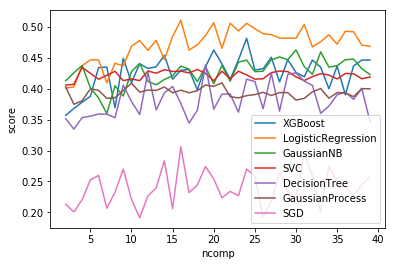

In [15]:
testPCA(data_for_analis, y)

Теперь стоит визуально посмотреть на распределение всех колонок по отдельности. Ниже нарисованы графики зависимости всех колонок от Grade. Grade имеет 4 разных значения и чтобы лучше было видно я взял именно эту колонку. Таким образом по оси Х можно увидеть влияет ли какая либо переменная на силу свечение. Я добавлял к точкам шум, чтобы лучше было видно и чтобы все точки не схлопывались в 1 точку. Некоторые колонки будут рассмотренны отдельно дальше, так как имеют особое распределение. Из графиков видно, что чем старше, тем больше вероятность свечения, если П/ПР == 2, то скорее всего опухоль будет хорошо святиться, в лобовой доле реже светится, в теменной как правило хорошее свечение. При Grade == 4 опухоль как правило светится, а при 2 как правило нет. (Легенда для всех одинаковая, но указана только 1 раз, чтобы лучше было видно)

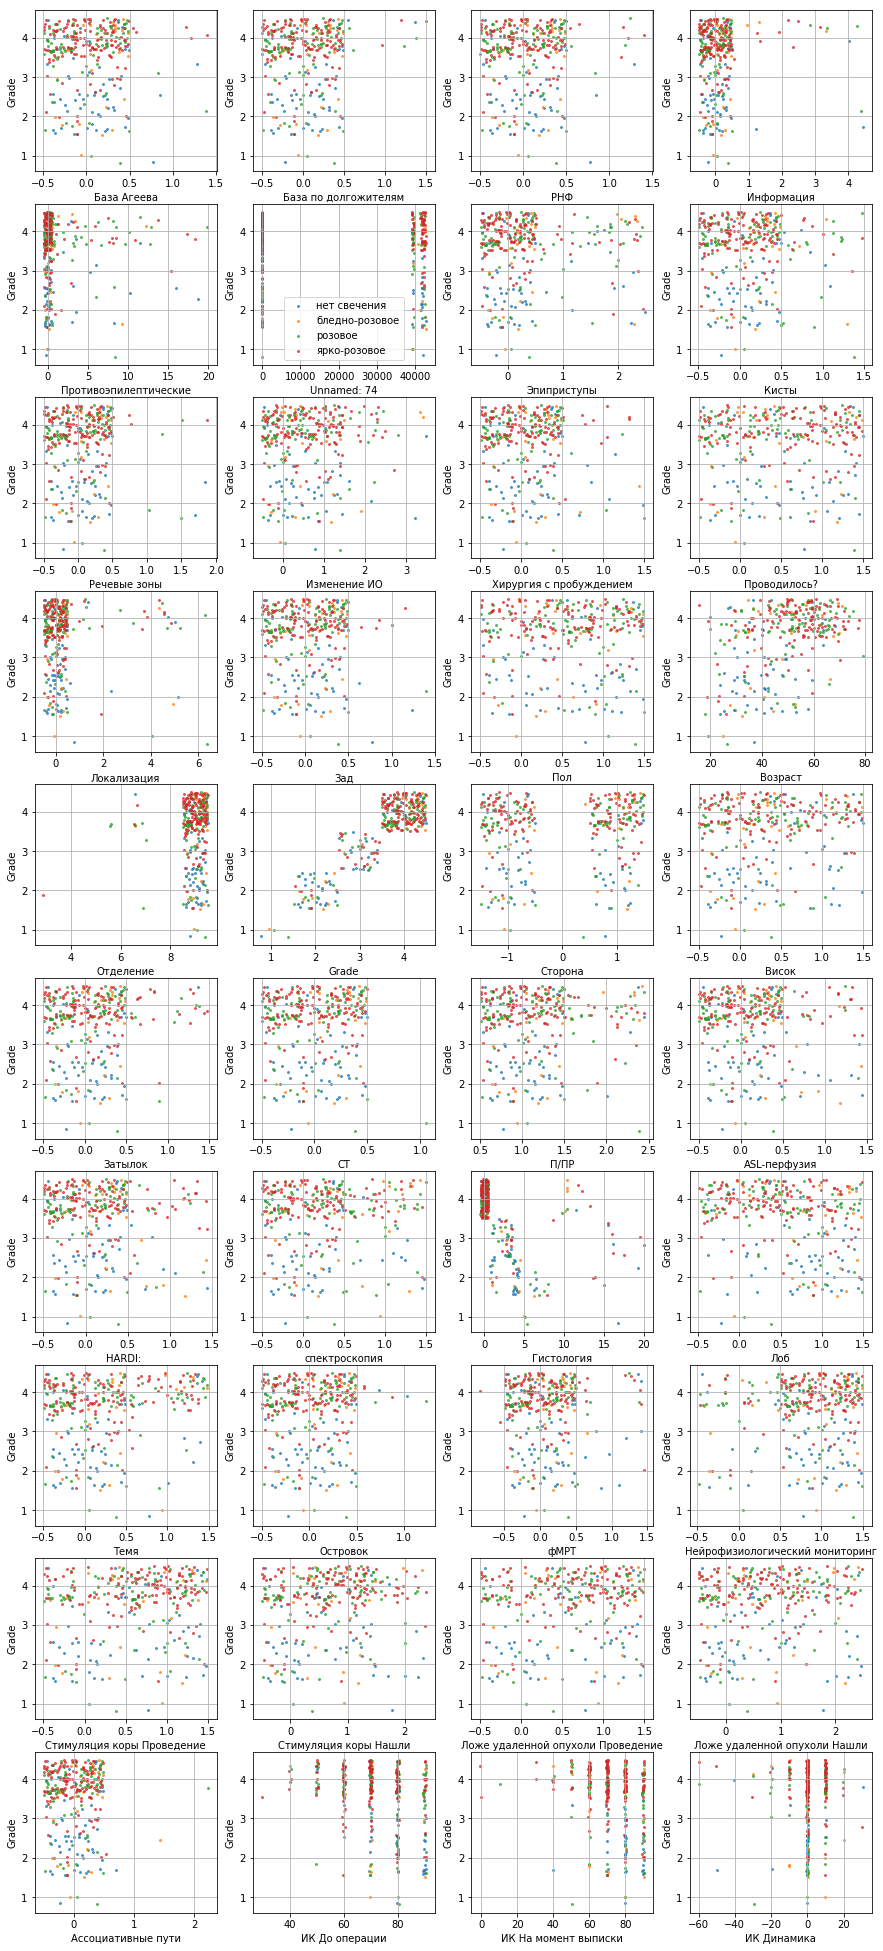

In [34]:
fig, axes = plt.subplots(ncols=4,nrows=10, figsize=(15, 35))

deltaX = np.random.rand(1, 320) - 0.5
deltaY = np.random.rand(1, 320) - 0.5
classes = [u'нет свечения',u'бледно-розовое',u'розовое',u'ярко-розовое']
i = 0
j = 0

for column in data_for_analis.columns:
    for clas in xrange(4):
        axes[j][i].scatter(y=(data_for_analis[u'Grade'] + deltaY[0])[y==clas],
                       x=(data_for_analis[column] + deltaX[0])[y==clas], s=4, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
    axes[j][i].set_ylabel(u'Grade')
    axes[j][i].set_xlabel(column)
    if column == u'Unnamed: 74':
        axes[j][i].legend()
    axes[j][i].grid()
    i += 1
    if i > 3:
        i = 0
        j += 1
        



Ниже предстваленны графики, для тех колонок, для которых из предыдущих графиков нельзя было сделать какой либо вывод. На этих признаках можно только заметить что при гистологии == 0 опухоль скорее всего светится.

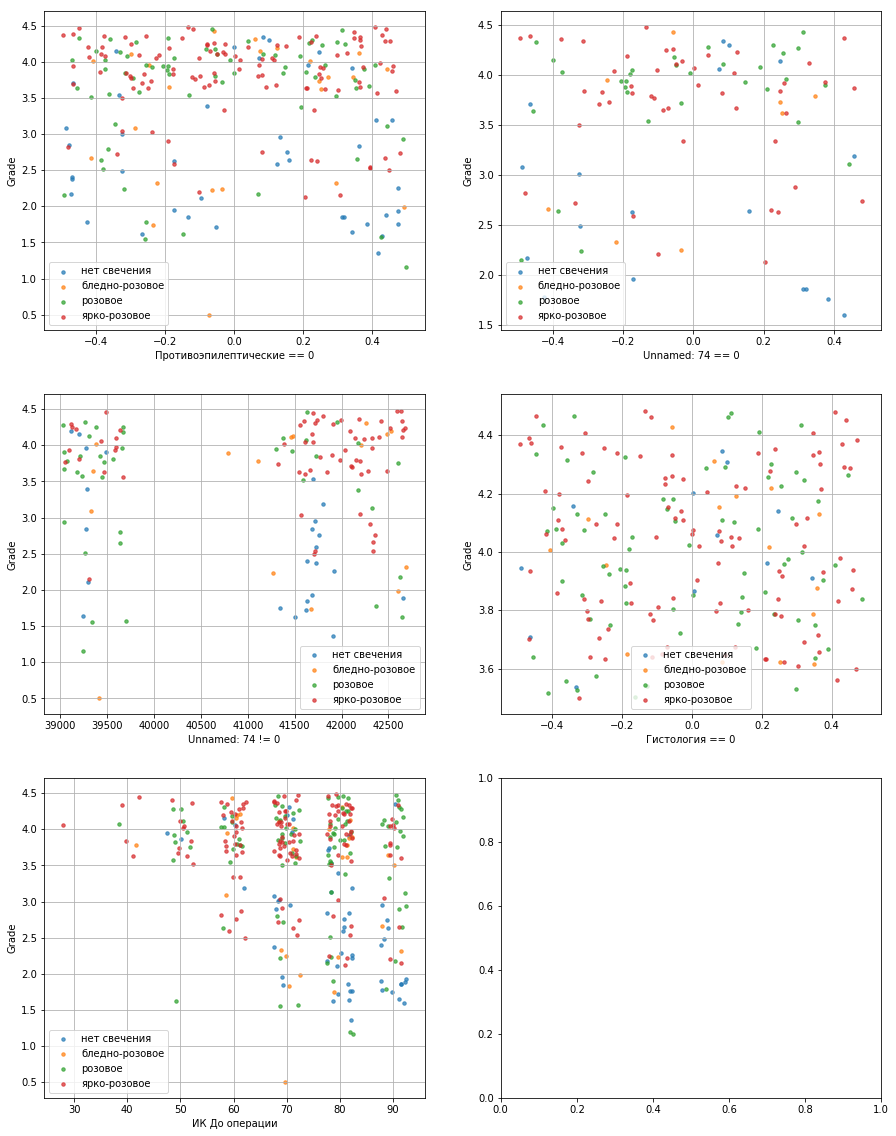

In [35]:
fig, axes = plt.subplots(ncols=2,nrows=3, figsize=(15, 20))

deltaX = np.random.rand(1, 320) - 0.5
deltaY = np.random.rand(1, 320) - 0.5
for clas in xrange(4):
    axes[0][0].scatter(y=((data_for_analis[u'Grade'] + deltaY[0])[y==clas])[data_for_analis[u'Противоэпилептические'] == 0],
                       x=((data_for_analis[u'Противоэпилептические'] + deltaX[0])[y==clas])[data_for_analis[u'Противоэпилептические']==0],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[0][0].set_ylabel(u'Grade')
axes[0][0].set_xlabel(u'Противоэпилептические == 0')
axes[0][0].legend()
axes[0][0].grid()

for clas in xrange(4):
    axes[0][1].scatter(y=((data_for_analis[u'Grade'] + deltaY[0])[y==clas])[data_for_analis[u'Unnamed: 74'] == 0],
                       x=((data_for_analis[u'Unnamed: 74'] + deltaX[0])[y==clas])[data_for_analis[u'Unnamed: 74']==0],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[0][1].set_ylabel(u'Grade')
axes[0][1].set_xlabel(u'Unnamed: 74 == 0')
axes[0][1].legend()
axes[0][1].grid()

for clas in xrange(4):
    axes[1][0].scatter(y=((data_for_analis[u'Grade'] + deltaY[0])[y==clas])[data_for_analis[u'Unnamed: 74'] > 30.0],
                       x=((data_for_analis[u'Unnamed: 74'])[y==clas])[data_for_analis[u'Unnamed: 74'] > 30.0],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[1][0].set_ylabel(u'Grade')
axes[1][0].set_xlabel(u'Unnamed: 74 != 0')
axes[1][0].legend()
axes[1][0].grid()

for clas in xrange(4):
    axes[1][1].scatter(y=((data_for_analis[u'Grade'] + deltaY[0])[y==clas])[data_for_analis[u'Гистология'] == 0],
                       x=((data_for_analis[u'Гистология'] + deltaX[0])[y==clas])[data_for_analis[u'Гистология'] == 0],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[1][1].set_ylabel(u'Grade')
axes[1][1].set_xlabel(u'Гистология == 0')
axes[1][1].legend()
axes[1][1].grid()


for clas in xrange(4):
    axes[2][0].scatter(y=((data_for_analis[u'Grade'] + deltaY[0])[y==clas]),
                       x=((data_for_analis[u'ИК До операции'] + (deltaX[0]) * 5)[y==clas]),
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[2][0].set_ylabel(u'Grade')
axes[2][0].set_xlabel(u'ИК До операции')
axes[2][0].legend()
axes[2][0].grid()

Применим вновь PCA, выявим 2 главные компоненты и построим график для них. Видим 2 района скопления для компоненты 0.

In [110]:
pca = PCA(n_components=2)
X = pca.fit(data_for_analis).transform(data_for_analis)

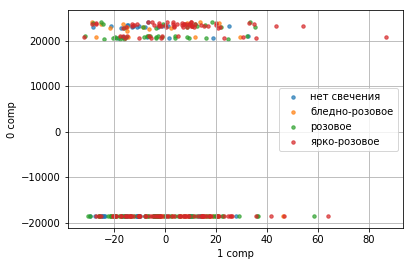

In [36]:
fig, axes = plt.subplots()

#deltaX = np.random.rand(1, 320) - 0.5
#deltaY = np.random.rand(1, 320) - 0.5
for clas in xrange(4):
    axes.scatter(y=(X.T[0])[y==clas],
                       x=(X.T[1])[y==clas],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes.set_ylabel(u'0 comp')
axes.set_xlabel(u'1 comp')
axes.legend()
axes.grid()

Рассмотрим поближе эти 2 района. Из графиков видно, что ни 1 ни 0 компонента ничего полезного для данной задачи не дают.

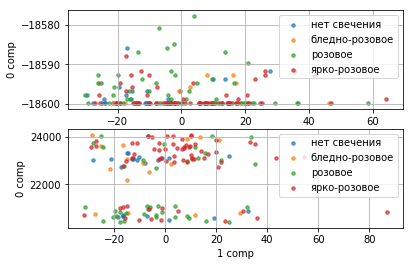

In [38]:
fig, axes = plt.subplots(ncols=1,nrows=2)

#deltaX = np.random.rand(1, 320) - 0.5
#deltaY = np.random.rand(1, 320) - 0.5
for clas in xrange(4):
    axes[0].scatter(y=(X.T[0])[(X.T[0] < 0) * (y==clas)],
                       x=(X.T[1])[(X.T[0] < 0) * (y==clas)],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[0].set_ylabel(u'0 comp')
axes[0].set_xlabel(u'1 comp')
axes[0].legend()
axes[0].grid()

for clas in xrange(4):
    axes[1].scatter(y=(X.T[0])[(X.T[0] > 0) * (y==clas)],
                       x=(X.T[1])[(X.T[0] > 0) * (y==clas)],
                       s=12, label=classes[clas], alpha=0.7)
    #axes[j][i].set_title(column)
axes[1].set_ylabel(u'0 comp')
axes[1].set_xlabel(u'1 comp')
axes[1].legend()
axes[1].grid()


Так как у медиков возникает вопрос не в том, как именно будет светиться опухоль, а будет ли вообще достаточное для операции свечение, попробуем предсказывать в качестве класса 0: если нет свячения или оно бледное, а в качестве 1 если оно хорошее или яркое. Классы получились не сбаллансированными (примерно 73% - класс 1), поэтому для орпеделения качества работы модели используется F1 мера. Лидеры все те же + наивный баес. Лучший результат примерно 0.85 у логрегресси и бустинга. Результат можно увидеть на графике.

{'model': 'LogisticRegression', 'score': 0.8545119714068502, 'ncomp': 13}


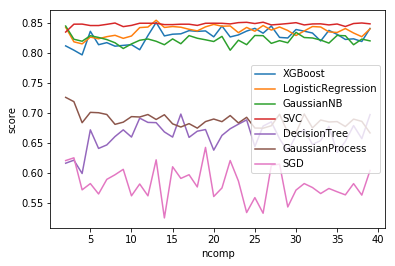

In [16]:
y1 = y.replace({0: 0, 1:0, 2: 1, 3:1})

testPCA(data_for_analis, y1, 'f1')

Отельно предскажем светится ли вообще. Тут лидер SVM с качеством в 0.91 при 37 главных компонентах. Так же отлично себя показывеат бустинг при 27 компонентах.

{'model': 'SVC', 'score': 0.9106945063098744, 'ncomp': 37}


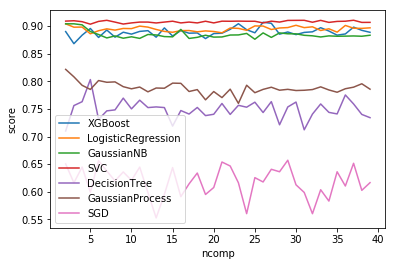

In [17]:
y2 = y.replace({0: 0, 1:1, 2:1, 3:1})
testPCA(data_for_analis, y2, 'f1')

Отдельно предскажем слабое свечение: логрегрессия дала 0.95 при 2х компонентах. Впрочем судя по граффику SVM почти всегда дает 0.95. Бустинг так же дает примерно 0.95 при большом кол-ве компонент. Логрегрессия так же выглядит крайне эффективно.

{'model': 'LogisticRegression', 'score': 0.9508196721311476, 'ncomp': 2}


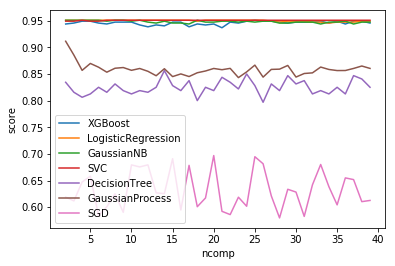

In [18]:
y3 = y.replace({0: 1, 1:0, 2:1, 3:1})
testPCA(data_for_analis, y3, 'f1')

Так как качество предсказания для слабого свечения и его отсутствия по отдельности лучше, чем при предсказании их как отельного класса, попробуем объединить лучшие модели для слабого свечения и его отсутствия. Итог примерно 0.84 f1 мера. Не многим хуже чем у обычных моделей, но к сожалению он их не превзошел.

In [21]:
from sklearn.base import BaseEstimator
class MyModel(BaseEstimator):
    def __init__(self):
        self.svc = SVC(kernel='rbf', shrinking=True, probability=False, degree=3)
        self.lr = LogisticRegression(solver='liblinear', multi_class='auto')
        self.pca = PCA(n_components=37)
    def fit(self, X, y):
        y3 = y.replace({0: 1, 1:0, 2:1, 3:1})
        self.lr.fit(X, y3)
        
        y2 = y.replace({0: 0, 1:1, 2:1, 3:1})
        
        X2 = self.pca.fit(X).transform(X)
        self.svc.fit(X2, y2)
        
    def predict(self, X):
        return self.lr.predict(X) & self.svc.predict(self.pca.transform(X))


In [22]:
resAc = []
resF1 = []
#X, y4 = shuffle(X, y)
for i in xrange(20):
    mmodel = MyModel()
    X_train, X_test, y_train, y_test = train_test_split(data_for_analis, y, test_size=0.1)
    mmodel.fit(X_train, y_train)
    ypred = mmodel.predict(X_test)
    y_test = y_test.replace({0: 0, 1:0, 2:1, 3:1})
    resAc.append(accuracy_score(y_test, ypred))
    resF1.append(f1_score(y_test, ypred))
    
print 'accuracy: ', np.mean(resAc)
print 'F1: ', np.mean(resF1)

C:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.7484375
F1:  0.849778728114852


Довольно любопытным признаком является параметр "Нормирование ASL". Он не был включен в модели, так как данный признак заполнен у слишком малого числа объектов. Посмотрим на график зависимости переменной "Нормирование ASL" от интенсивности свечения. Вывод: если ASL больше 5 то скорее всего опухоль будет светиться, иначе чуть более вероятно что будет плохое свечение. Таким образом можно сделать вывод, что данный признак достаточно полезный, но к сожалению его не получилось включить в модель.

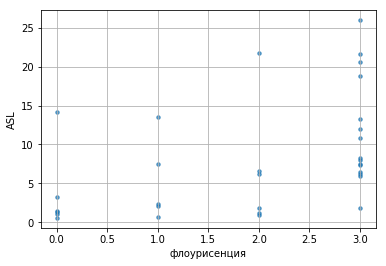

In [201]:
fig, axes = plt.subplots()

#deltaX = np.random.rand(1, 320) - 0.5
#deltaY = np.random.rand(1, 320) - 0.5

axes.scatter(x=(y)[ndata[u'ASL-перфузия']==u'Да'],
            y=(ndata[u'Нормирование ASL'])[ndata[u'ASL-перфузия']==u'Да'],
            s=12, label=clas, alpha=0.7)

axes.set_xlabel(u'флоурисенция')
axes.set_ylabel(u'ASL')
#axes.legend()
axes.grid()

In [221]:
1.0 * np.sum(y1) / len(y1)

0.73125

Попробуем с помощью дерева решений выяснить наиболее значимые признаки. Построим наиболее эффективное дерево решений и увидим, что наиболее значимыми являются гистология и возраст, так как они используются на верхних уровнях дерева.

In [17]:
criterions = ['gini', 'entropy']
splitters = ['best', 'random']
bestF1={'score': 0,
     'criterion': 'gini',
     'splitter': 'best',
     'max_depth': 3,
     'min_samples_split': 2,
     'max_features': 4}
bestAc={'score': 0,
     'criterion': 'gini',
     'splitter': 'best',
     'max_depth': 3,
     'min_samples_split': 2,
     'max_features': 4}

#X, y4 = shuffle(X, y)
for criterion in criterions:
    for splitter in splitters:
        for max_depth in xrange(3, 30):
            for min_samples_split in xrange(2, 5):
                for max_features in xrange(4, 35):
                    currF1 = []
                    currAc = []
                    for i in xrange(5):
                        mmodel = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth,
                                                       min_samples_split=min_samples_split, max_features=max_features)
                        X_train, X_test, y_train, y_test = train_test_split(data_for_analis, y1, test_size=0.1)
                        mmodel.fit(X_train, y_train)
                        ypred = mmodel.predict(X_test)
                        
                        currF1.append(f1_score(y_test, ypred))
                        currAc.append(accuracy_score(y_test, ypred))
                    currF1 = np.mean(currF1)
                    currAc = np.mean(currAc)
                    if currF1 > bestF1['score']:
                        bestF1['score'] = currF1
                        bestF1['criterion'] = criterion
                        bestF1['splitter'] = splitter
                        bestF1['max_depth'] = max_depth
                        bestF1['min_samples_split'] = min_samples_split
                        bestF1['max_features'] = max_features
                        
                    if currAc > bestAc['score']:
                        bestAc['score'] = currAc
                        bestAc['criterion'] = criterion
                        bestAc['splitter'] = splitter
                        bestAc['max_depth'] = max_depth
                        bestAc['min_samples_split'] = min_samples_split
                        bestAc['max_features'] = max_features
                    
                        
print bestF1

{'splitter': 'best', 'max_features': 5, 'score': 0.9079078087375301, 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 4}


0.9019607843137256


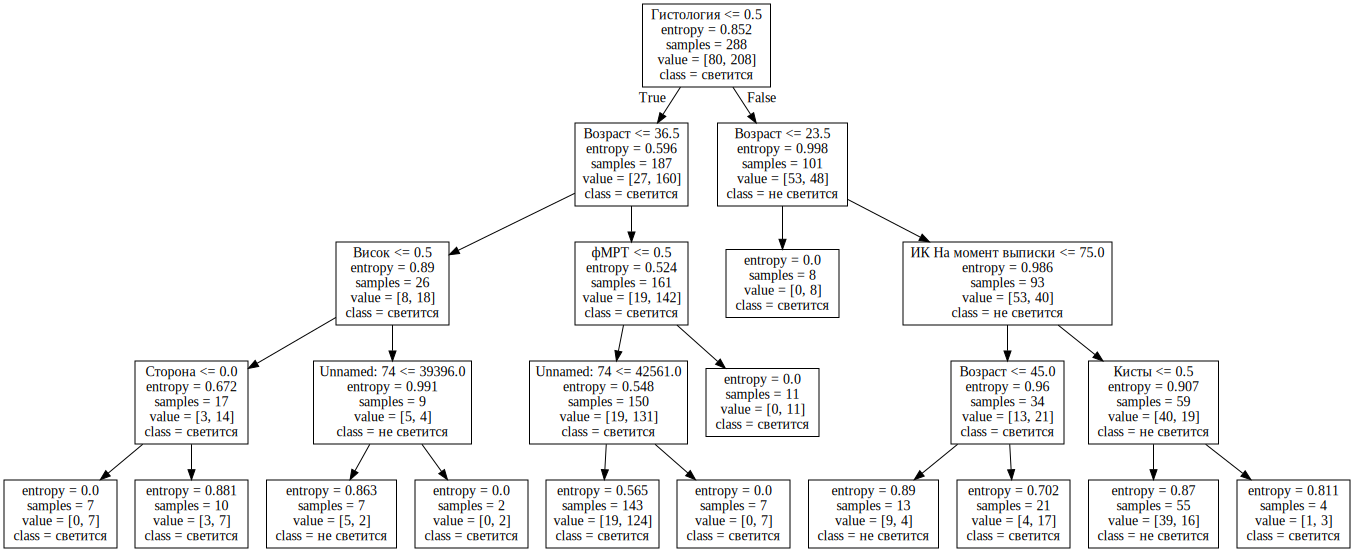

In [30]:
import graphviz
from sklearn.tree import export_graphviz

#костыль чтоб работало на винде
import os
os.environ["PATH"] += os.pathsep + 'C:/python/Library/bin/graphviz'
#end костыль

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4,
                                                       min_samples_split=3, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(data_for_analis, y1, test_size=0.1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print f1_score(y_test, ypred)

dot_data = export_graphviz(clf, out_file=None, feature_names=data_for_analis.columns,
                           class_names=[u'не светится', u'светится']) 
graph = graphviz.Source(dot_data) 
graph

Смотря на графики и используя дерево решений мы выяснили какие колонки влияют на целевую переменную. Попробуем использовать только эти колонки для построения модели. Лидеры бустинг и SVM. В обоих случаях качество по f1 мере 0.86, что немного лучше чем при использовании всех признаков и PCA. 

In [79]:
graphFeatures = [u'Возраст', u'П/ПР',u'Лоб', u'Темя', u'Grade', u'Гистология']
print check_models(data_for_analis[graphFeatures], y)
print check_models(data_for_analis[graphFeatures], y1, metric='f1')


{'XGBoost': 0.4124798387096774, 'LogisticRegression': 0.46840664711632457, 'GaussianNB': 0.4609707966764419, 'SVC': 0.4737218963831866, 'DecisionTree': 0.34393939393939393, 'GaussianProcess': 0.44405730694037143, 'SGD': 0.31700757575757577}


C:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'XGBoost': 0.8673888076969918, 'LogisticRegression': 0.8443558620029208, 'GaussianNB': 0.8484656990147277, 'SVC': 0.8656792537043845, 'DecisionTree': 0.6888196480938418, 'GaussianProcess': 0.8441637437583729, 'SGD': 0.6167227592630946}


Таким образом наилучшем решением являются бустинг и SVM на малом кол-ве признаков. Наиболее значимыми признаками, влияющими на флуоресценцию глиомы являются 'Возраст', 'П/ПР', 'Лоб', 'Темя', 'Grade', 'Гистология' и 'Нормирование ASL'.

Поиграемся с параметрами SVM

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
decision_function_shapes = ['ovo', 'ovr']
bestF1={'score': 0,
     'kernel': 'linear',
     'decision_function_shape': 'ovo',
     'degree': 3,
     'probability': 2,
     'shrinking': 4}
X = data_for_analis
for kernel in kernels:
    for decision_function_shape in decision_function_shapes:
        if kernel == 'poly':
            for i in xrange(2, 6):
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=True)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = True
                    bestF1['shrinking'] = True
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=True)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = False
                    bestF1['shrinking'] = True
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=False)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = True
                    bestF1['shrinking'] = False
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=False)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = False
                    bestF1['shrinking'] = False
        else:
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=True)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = True
                bestF1['shrinking'] = True
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=True)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = False
                bestF1['shrinking'] = True
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=False)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = True
                bestF1['shrinking'] = False
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=False)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = False
                bestF1['shrinking'] = False
                
print bestF1

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
decision_function_shapes = ['ovo', 'ovr']
bestF1={'score': 0,
     'kernel': 'linear',
     'decision_function_shape': 'ovo',
     'degree': 3,
     'probability': 2,
     'shrinking': 4}
X = data_for_analis[graphFeatures]
for kernel in kernels:
    for decision_function_shape in decision_function_shapes:
        if kernel == 'poly':
            for i in xrange(2, 6):
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=True)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = True
                    bestF1['shrinking'] = True
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=True)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = False
                    bestF1['shrinking'] = True
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=False)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = True
                    bestF1['shrinking'] = False
                    
                svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=False)
                cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
                currscore = np.mean(cv['test_score'])
                if currscore > bestF1['score']:
                    bestF1['score'] = currscore
                    bestF1['kernel'] = kernel
                    bestF1['decision_function_shape'] = decision_function_shape
                    bestF1['degree'] = i
                    bestF1['probability'] = False
                    bestF1['shrinking'] = False
        else:
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=True)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = True
                bestF1['shrinking'] = True
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=True)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = False
                bestF1['shrinking'] = True
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=True, shrinking=False)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = True
                bestF1['shrinking'] = False
                    
            svc = SVC(kernel=kernel, decision_function_shape=decision_function_shape, degree=i,
                         probability=False, shrinking=False)
            cv = cross_validate(svc, X, y1, cv=10, scoring='f1')
            currscore = np.mean(cv['test_score'])
            if currscore > bestF1['score']:
                bestF1['score'] = currscore
                bestF1['kernel'] = kernel
                bestF1['decision_function_shape'] = decision_function_shape
                bestF1['degree'] = i
                bestF1['probability'] = False
                bestF1['shrinking'] = False
                
print bestF1

In [12]:
y2 = y.replace({0: 0, 1:1, 2:1, 3:1})
data_for_analis

,База Агеева,База по долгожителям,РНФ,Информация,Противоэпилептические,Unnamed: 74,Эпиприступы,Кисты,Речевые зоны,Изменение ИО,...,фМРТ,Нейрофизиологический мониторинг,Стимуляция коры Проведение,Стимуляция коры Нашли,Ложе удаленной опухоли Проведение,Ложе удаленной опухоли Нашли,Ассоциативные пути,ИК До операции,ИК На момент выписки,ИК Динамика
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,0.0,0.0,0.0,0.0,0.0,90,90,0
1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,1.0,1.0,1.0,1.0,0.0,80,80,0
2,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,...,0,1,1.0,1.0,1.0,1.0,2.0,80,80,0
3,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,1,1.0,1.0,1.0,1.0,0.0,90,90,0
4,0,0,0,0,1,7.0,1.0,1.0,0.0,0.0,...,0,1,1.0,1.0,1.0,1.0,0.0,80,80,0
5,0,1,0,0,2,1.0,1.0,0.0,0.0,0.0,...,0,1,1.0,2.0,1.0,1.0,0.0,70,70,0
6,0,0,0,0,3,3.0,2.0,0.0,0.0,1.0,...,0,1,1.0,1.0,1.0,1.0,0.0,80,90,10
7,0,0,0,0,0,39032.0,0.0,0.0,0.0,0.0,...,0,1,1.0,1.0,1.0,1.0,0.0,50,60,10
8,0,1,0,0,0,39038.0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,80,90,10
9,0,0,0,0,0,39043.0,0.0,1.0,0.0,0.0,...,0,1,1.0,1.0,1.0,1.0,0.0,80,80,0


In [17]:
data_for_analis.columns[15]

'Возраст'

In [16]:
from scipy.stats import pearsonr
for i in data_for_analis.columns:
    print(i, pearsonr(data_for_analis[i], y2))

База Агеева (-0.0590858064461389, 0.2920002674098402)
База по долгожителям (-0.02114177673475089, 0.7063536588398936)
РНФ (-0.030203073815855117, 0.590371657682194)
Информация (-0.02004318341185683, 0.7209599277472909)
Противоэпилептические (-0.04063140525921489, 0.4688867898016327)
Unnamed: 74 (0.023854064747354964, 0.6707600434177621)
Эпиприступы (-0.023736805272271004, 0.6722844320535418)
Кисты (0.016448792373994273, 0.7694355434442635)
Речевые зоны (-0.0493095113908268, 0.37931536437492497)
Изменение ИО (0.002310380886017836, 0.9671622267236445)
Хирургия с пробуждением (-0.06288961827564538, 0.2619849466656321)
Проводилось? (0.0012365852882856966, 0.9824207113935796)
Локализация (-0.007958068714991943, 0.8872352847474017)
Зад (-0.0708871337576942, 0.2059800363737457)
Пол (0.018144775759772344, 0.7464377268351743)
Возраст (0.26772284602743907, 1.1772845369895242e-06)
Отделение (-0.04667709108601062, 0.40531224444277913)
Grade (0.4502388713335055, 2.2300565974993973e-17)
Сторона (0.0

In [42]:
from scipy.stats import spearmanr
for i in data_for_analis.columns:
    print(i, spearmanr(data_for_analis[i], y2))

База Агеева SpearmanrResult(correlation=-0.05908580644613889, pvalue=0.2920002674098364)
База по долгожителям SpearmanrResult(correlation=-0.021141776734750907, pvalue=0.7063536588399018)
РНФ SpearmanrResult(correlation=-0.030203073815855127, pvalue=0.5903716576822031)
Информация SpearmanrResult(correlation=0.009347434836967218, pvalue=0.8677152560457249)
Противоэпилептические SpearmanrResult(correlation=-0.03252193074840249, pvalue=0.562152890341202)
Unnamed: 74 SpearmanrResult(correlation=0.037847986160656044, pvalue=0.4999060084660296)
Эпиприступы SpearmanrResult(correlation=-0.02159686803332722, pvalue=0.7003340531166171)
Кисты SpearmanrResult(correlation=0.016448792373994225, pvalue=0.7694355434442339)
Речевые зоны SpearmanrResult(correlation=-0.01358809186122885, pvalue=0.8086785432879525)
Изменение ИО SpearmanrResult(correlation=0.005994411377882692, pvalue=0.9149376330099102)
Хирургия с пробуждением SpearmanrResult(correlation=-0.0628896182756454, pvalue=0.26198494666563155)
Пр

In [39]:
pca = PCA(n_components=40)
X = pca.fit(data_for_analis, y2).transform(data_for_analis)

In [85]:
sum(y2) / len(y2)

0.825

In [36]:
pca.get_covariance()

array([[ 9.30994877e+00,  3.17505330e-04,  6.73453058e-04, ...,
        -7.71605940e-02, -1.11149176e-01, -3.39885816e-02],
       [ 3.17505330e-04,  9.30882144e+00, -5.43708292e-05, ...,
         7.58767494e-02,  9.79418956e-02,  2.20651462e-02],
       [ 6.73453058e-04, -5.43708292e-05,  9.30950949e+00, ...,
        -2.60827600e-01, -3.49246261e-01, -8.84186609e-02],
       ...,
       [-7.71605940e-02,  7.58767494e-02, -2.60827600e-01, ...,
         1.09421750e+02,  1.32759296e+02,  3.26461963e+01],
       [-1.11149176e-01,  9.79418956e-02, -3.49246261e-01, ...,
         1.32759296e+02,  1.85422709e+02,  4.33547628e+01],
       [-3.39885816e-02,  2.20651462e-02, -8.84186609e-02, ...,
         3.26461963e+01,  4.33547628e+01,  2.00172164e+01]])

In [46]:
ddata = data_for_analis[[u'Пол', u'Возраст' ,u'Grade', u'Сторона', u'Висок', u'Затылок', u'Лоб', u'Темя', u'Островок', u'Гистология', u'ИК До операции']]

In [47]:
ddata

,Пол,Возраст,Grade,Сторона,Висок,Затылок,Лоб,Темя,Островок,Гистология,ИК До операции
0,1,70,4,-1,0,0,1,0,0,0,90
1,1,59,4,-1,0,0,0,1,0,0,80
2,1,60,4,-1,0,0,0,0,1,0,80
3,1,25,3,1,1,0,0,0,0,1,90
4,0,27,3,-1,0,0,1,0,0,2,80
5,1,37,4,-1,0,0,1,0,0,0,70
6,1,51,4,1,0,0,1,0,0,0,80
7,1,63,4,1,1,0,0,0,0,0,50
8,1,51,4,-1,0,1,0,0,0,0,80
9,0,30,4,-1,0,0,1,0,0,0,80


In [49]:
dt = DecisionTreeClassifier(criterion='gini')
cv = cross_validate(dt, ddata, y2, cv=10, scoring='f1')
np.mean(cv['test_score'])

0.86127104738097

0.9473684210526316


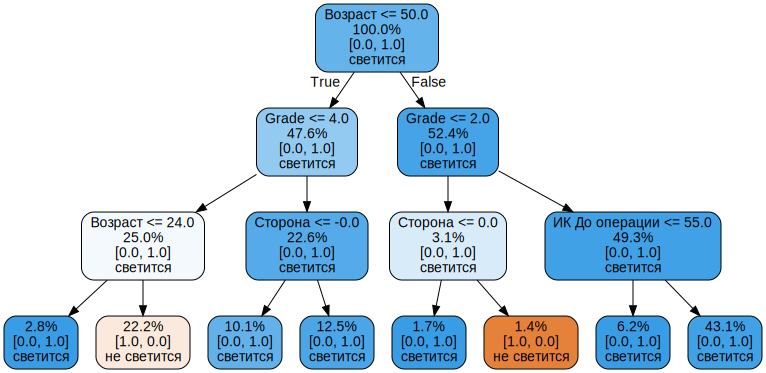

In [80]:
import graphviz
from sklearn.tree import export_graphviz

#костыль чтоб работало на винде
import os
os.environ["PATH"] += os.pathsep + 'C:/python/Library/bin/graphviz'
#end костыль

clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3,
                                                       min_samples_split=3, max_features=5)

X_train, X_test, y_train, y_test = train_test_split(ddata, y2, test_size=0.1)
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print (f1_score(y_test, ypred))

dot_data = export_graphviz(clf, out_file=None, feature_names=ddata.columns,
                           class_names=[u'не светится', u'светится'], impurity=False, label='none',
                          proportion=True, rounded=True, precision=0, filled=True) 
graph = graphviz.Source(dot_data, filename='tree.png', format='png') 
graph

In [82]:
graph.save()

'tree.png'

In [78]:
?graphviz.Source